## Analisaremos la base de datos de Exceso de mortalidad 2020 historico

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Para insertar las gráficas dentro del entorno
%matplotlib inline

Comenzamos importando nuestros datos

In [46]:
ruta_path = "201110EXCESOMORTALIDADMX.csv"
#ruta_path = "C:/Users/nala_/Desktop/tarea_libreta/Catalogos_de_Urgencias_2008-2014/CatCLUES.csv"
df = pd.read_csv(ruta_path, sep=',')  # Utiliza la opción moderna
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DEFUNCION,FECHA_REGISTRO,SEXO,EDAD
0,2020-11-09,z2ab80,10,12,2020-09-13,2020-09-16,2,68
1,2020-11-09,z4c512,21,74,2020-08-19,2020-08-19,2,64
2,2020-11-09,z1b582,21,132,2020-07-30,2020-07-31,1,69
3,2020-11-09,zz6f0e,21,194,2020-09-02,2020-09-04,2,71
4,2020-11-09,z5359f,21,208,2020-08-06,2020-08-07,2,23


El dato más importante sería la fecha de defunción

In [47]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711430 entries, 0 to 711429
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  711430 non-null  object
 1   ID_REGISTRO          711430 non-null  object
 2   ENTIDAD_REG          711430 non-null  int64 
 3   MUNICIPIO_REG        711430 non-null  int64 
 4   FECHA_DEFUNCION      711430 non-null  object
 5   FECHA_REGISTRO       711430 non-null  object
 6   SEXO                 711430 non-null  int64 
 7   EDAD                 711430 non-null  object
dtypes: int64(3), object(5)
memory usage: 43.4+ MB


Lo primero que haremos será convertir la variable `FECHA_DEFUNCION`en un formato de fechas y la edad a tipo entero.

In [74]:
df['FECHA_DEFUNCION'] = pd.to_datetime(df.FECHA_DEFUNCION, format="%Y-%m-%d")
df['EDAD'] = pd.to_numeric(df['EDAD'], downcast='integer', errors='coerce')
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DEFUNCION,FECHA_REGISTRO,SEXO,EDAD
0,2020-11-09,z2ab80,Durango,12,2020-09-13,2020-09-16,2,68.0
1,2020-11-09,z4c512,Puebla,74,2020-08-19,2020-08-19,2,64.0
2,2020-11-09,z1b582,Puebla,132,2020-07-30,2020-07-31,1,69.0
3,2020-11-09,zz6f0e,Puebla,194,2020-09-02,2020-09-04,2,71.0
4,2020-11-09,z5359f,Puebla,208,2020-08-06,2020-08-07,2,23.0
...,...,...,...,...,...,...,...,...
711425,2020-11-09,193575,México,77,2020-01-30,2020-01-31,2,84.0
711426,2020-11-09,16e7a2,Quintana Roo,2,2020-02-20,2020-02-23,2,23.0
711427,2020-11-09,066fa7,Ciudad de México,15,2020-01-26,2020-01-27,1,89.0
711428,2020-11-09,029526,México,76,2020-01-26,2020-01-27,1,78.0


Los registros de las entidades estan en orden alfabetico, 1 corresponde con Aguascalientes y 32 con Zacatecas, mientras que 33 y 34 corresponden con nacional y extranjero ref: https://www.agricultura.gob.mx/sites/default/files/sagarpa/document/2018/07/17/8/180717115914/entidades-federativas.
Por lo tanto cambiamos esos campor por los estados para tener un registro más claro

In [75]:
#sustituimos sexo por Masculino y femenino
df.loc[df.SEXO == '1', 'SEXO']= 'Masculino'
df.loc[df.SEXO == '2', 'SEXO']= 'Femenino'

#Lista de nombres de los estados en orden alfabético
estados = [
    'Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima',
    'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán', 'Morelos', 
    'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 
    'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas', 'Nacional', 'Extranjero']

#Creamos el diccionario de mapeo
mapeo1 = {i + 1: estado for i, estado in enumerate(estados)}

# Reemplazar los valores en la columna 'ENTIDAD_REG'
df['ENTIDAD_REG'] = df['ENTIDAD_REG'].replace(mapping)

# Mostrar el DataFrame resultante
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DEFUNCION,FECHA_REGISTRO,SEXO,EDAD
0,2020-11-09,z2ab80,Durango,12,2020-09-13,2020-09-16,2,68.0
1,2020-11-09,z4c512,Puebla,74,2020-08-19,2020-08-19,2,64.0
2,2020-11-09,z1b582,Puebla,132,2020-07-30,2020-07-31,1,69.0
3,2020-11-09,zz6f0e,Puebla,194,2020-09-02,2020-09-04,2,71.0
4,2020-11-09,z5359f,Puebla,208,2020-08-06,2020-08-07,2,23.0
...,...,...,...,...,...,...,...,...
711425,2020-11-09,193575,México,77,2020-01-30,2020-01-31,2,84.0
711426,2020-11-09,16e7a2,Quintana Roo,2,2020-02-20,2020-02-23,2,23.0
711427,2020-11-09,066fa7,Ciudad de México,15,2020-01-26,2020-01-27,1,89.0
711428,2020-11-09,029526,México,76,2020-01-26,2020-01-27,1,78.0


Creamos un nuevo data frame solo con las variables que nos interesan como: `ENTIDAD_REG`, `FECHA_DEFUNCION`, `SEXO` y `EDAD` y del estado de sonora.

In [76]:
df_red = df.loc[: , ['ENTIDAD_REG', 'FECHA_DEFUNCION', 'SEXO', 'EDAD']]
df_red

,ENTIDAD_REG,FECHA_DEFUNCION,SEXO,EDAD
0,Durango,2020-09-13,2,68.0
1,Puebla,2020-08-19,2,64.0
2,Puebla,2020-07-30,1,69.0
3,Puebla,2020-09-02,2,71.0
4,Puebla,2020-08-06,2,23.0
...,...,...,...,...
711425,México,2020-01-30,2,84.0
711426,Quintana Roo,2020-02-20,2,23.0
711427,Ciudad de México,2020-01-26,1,89.0
711428,México,2020-01-26,1,78.0


Hacemos una grafica de barras para ver el estado con más defunciones.

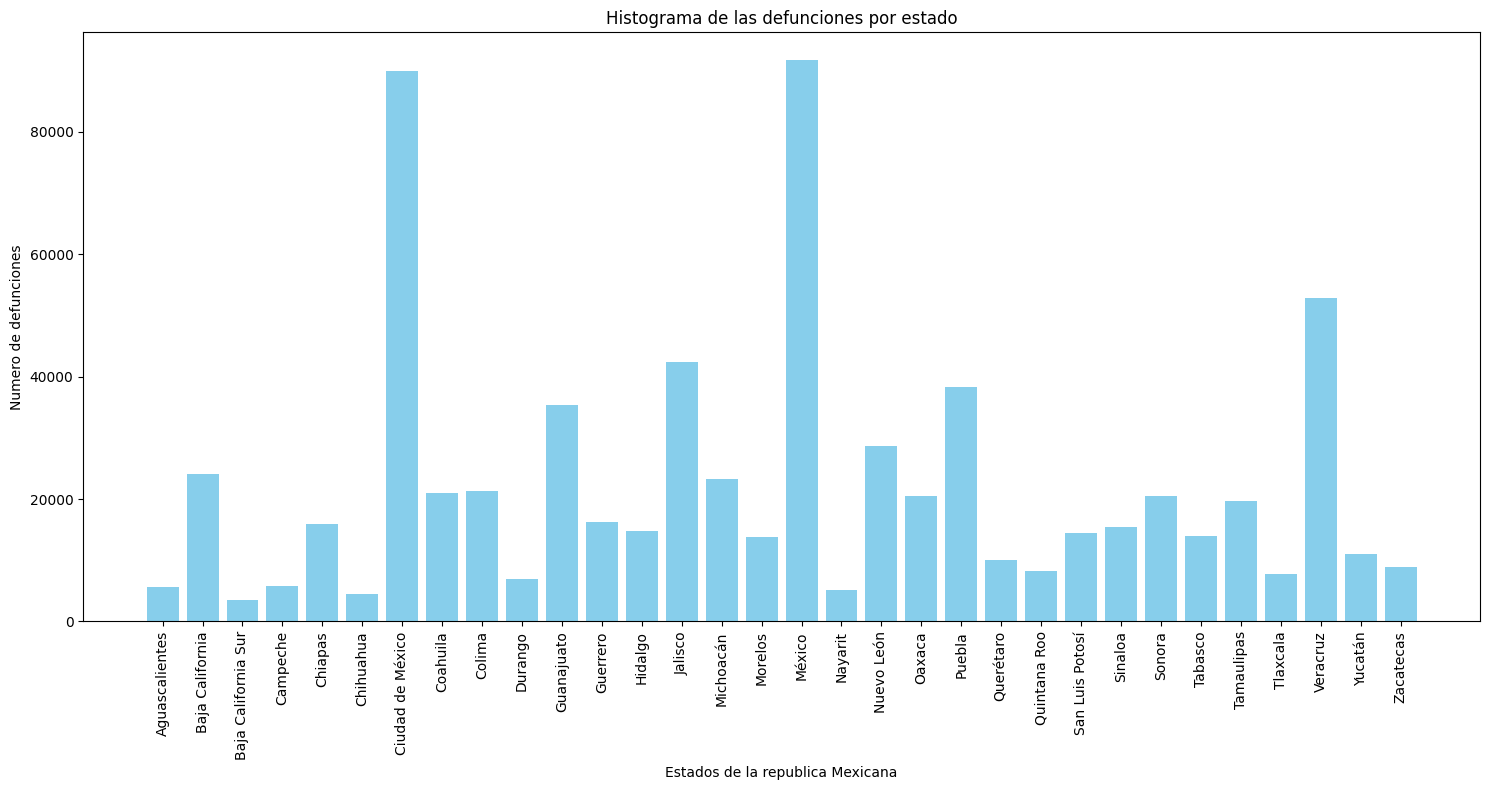

In [77]:
counts = df['ENTIDAD_REG'].value_counts().sort_index()

# Crear el histograma
plt.figure(figsize=(15, 8))
plt.bar(counts.index, counts.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estados de la republica Mexicana')
plt.ylabel('Numero de defunciones')
plt.title('Histograma de las defunciones por estado')

# Rotar las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

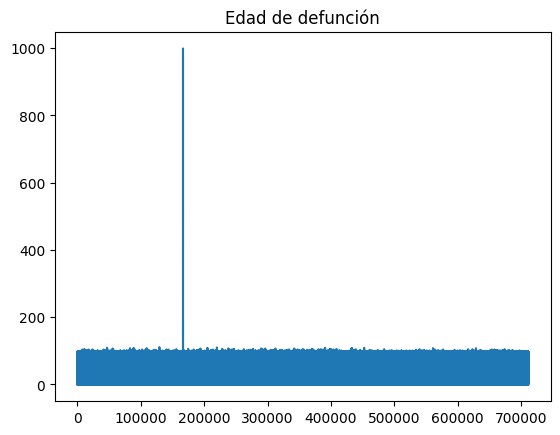

In [82]:
ax = df_red.EDAD.plot(
    title='Edad de defunción',
)

Tenemos un dato atipico.

# Solo podemos concluir que la ciudad de méxico y el estado de méxico son los estados con mayor número de defunciones.